In [ ]:
import tensorflow as tf

In [ ]:
def nin_b(x, num_channels, kernel_size, strides, padding):
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(num_channels, kernel_size, strides = strides, padding = padding, activation = 'relu')(x)
    x = tf.keras.layers.Conv2D(num_channels, kernel_size = 1, activation = 'relu')(x)
    x = tf.keras.layers.Conv2D(num_channels, kernel_size = 1, activation = 'relu')(x)
    return x

def network_in_network():
    input_image = tf.keras.Input(shape = (224, 224, 3))
    x = nin_b(input_image, 96, 11, 4, 'valid')
    x = tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2)(x)

    x = nin_b(x, 256, 5, 1, 'same')
    x = tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2)(x)

    x = nin_b(x, 384, 3, 1, 'same')
    x = tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2)(x)
    
    #output1
    o1 = nin_b(x, 10, 3, 1, 'same')
    o1 = tf.keras.layers.GlobalAveragePooling2D()(o1)
    o1 = tf.keras.layers.Reshape((1, 1, 10))(o1)
    o1 = tf.keras.layers.Flatten()(o1)

    x = tf.keras.Model(inputs = input_image, outputs = o1)
    return x



In [ ]:
nin_model = network_in_network()

In [ ]:
nin_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 96)        9312      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 96)        9312      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 96)        384   

In [ ]:
x = tf.random.uniform((1,224,224,3))
for layer in network_in_network().layers:
    x = layer(x)
    print(layer.__class__.__name__, 'output shape:\t\t', x.shape)

InputLayer output shape:		 (1, 224, 224, 3)
BatchNormalization output shape:		 (1, 224, 224, 3)
Conv2D output shape:		 (1, 54, 54, 96)
Conv2D output shape:		 (1, 54, 54, 96)
Conv2D output shape:		 (1, 54, 54, 96)
MaxPooling2D output shape:		 (1, 26, 26, 96)
BatchNormalization output shape:		 (1, 26, 26, 96)
Conv2D output shape:		 (1, 26, 26, 256)
Conv2D output shape:		 (1, 26, 26, 256)
Conv2D output shape:		 (1, 26, 26, 256)
MaxPooling2D output shape:		 (1, 12, 12, 256)
BatchNormalization output shape:		 (1, 12, 12, 256)
Conv2D output shape:		 (1, 12, 12, 384)
Conv2D output shape:		 (1, 12, 12, 384)
Conv2D output shape:		 (1, 12, 12, 384)
MaxPooling2D output shape:		 (1, 5, 5, 384)
BatchNormalization output shape:		 (1, 5, 5, 384)
Conv2D output shape:		 (1, 5, 5, 10)
Conv2D output shape:		 (1, 5, 5, 10)
Conv2D output shape:		 (1, 5, 5, 10)
GlobalAveragePooling2D output shape:		 (1, 10)
Reshape output shape:		 (1, 1, 1, 10)
Flatten output shape:		 (1, 10)


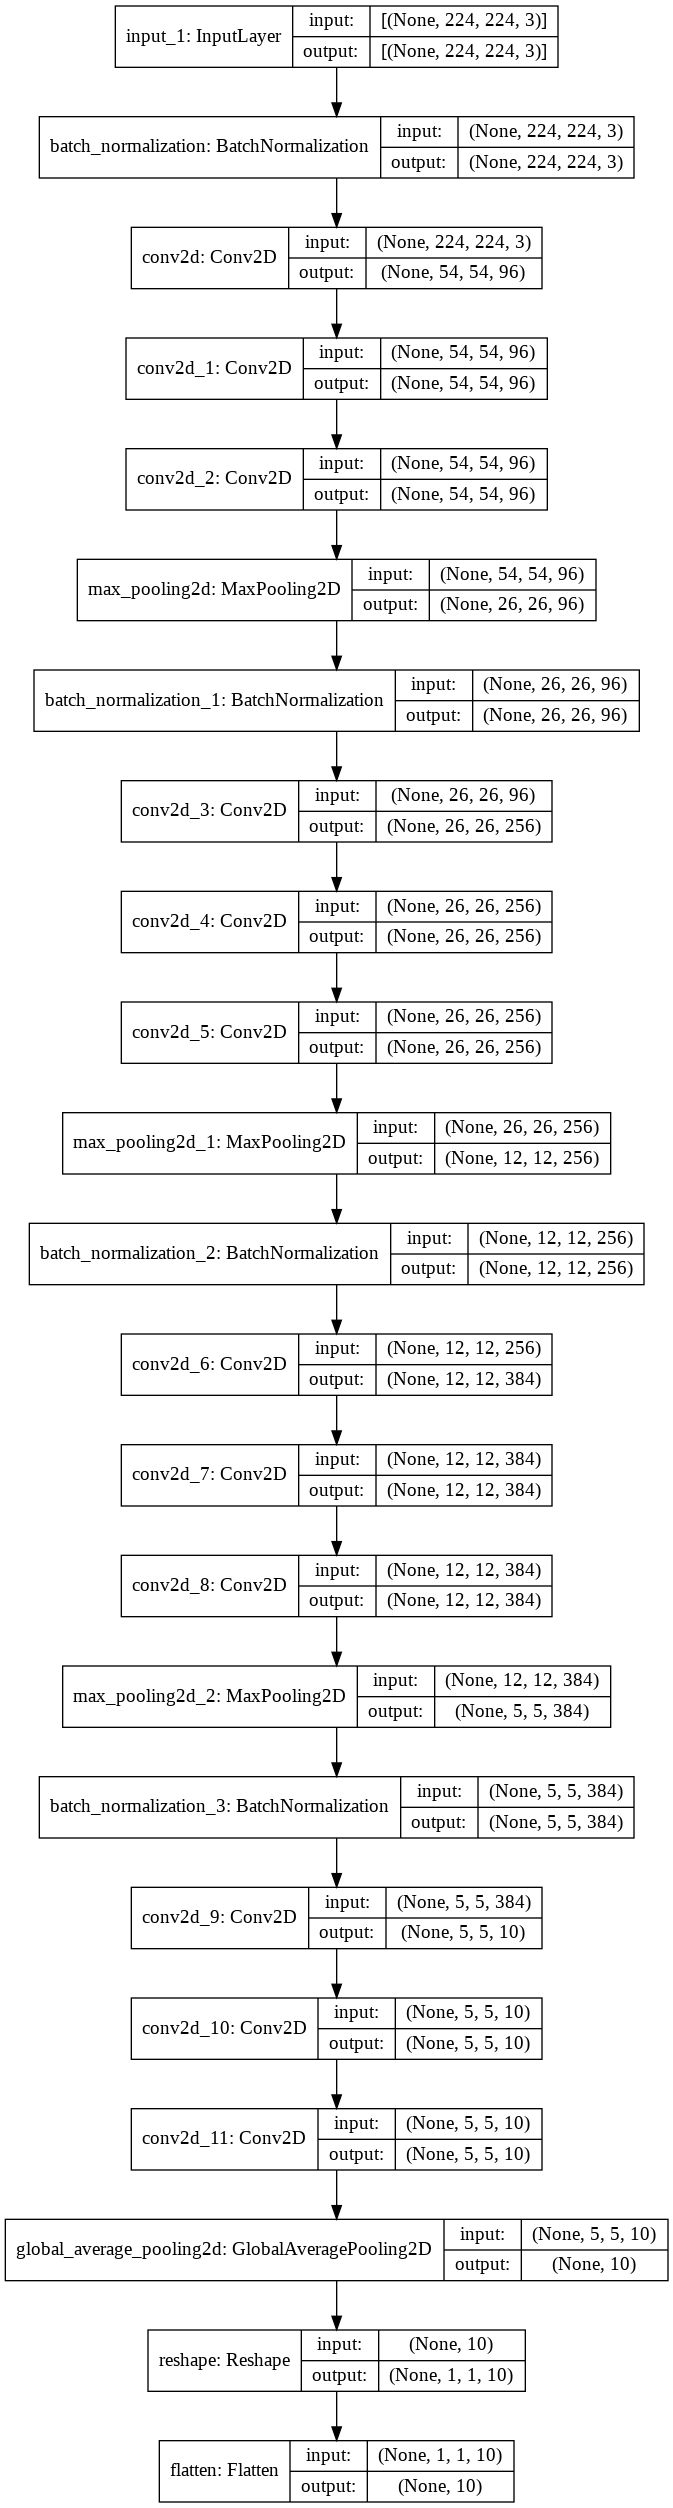

In [ ]:
tf.keras.utils.plot_model(nin_model, to_file = 'nin_model.png', show_shapes=True, show_layer_names=True)